
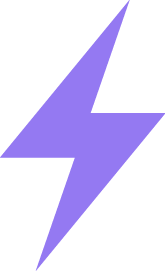

Running local mode, some functionality limited.



In [2]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
from geopy.distance import lonlat, distance, geodesic
import os
import tarfile
pd.options.display.max_columns = 999

##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

pop = pd.read_csv('../API_SP.POP.TOTL_DS2_en_csv_v2.csv') #from https://github.com/dphuang2/streamsets_scripts/blob/master/IM-testing/origin/API_SP.POP.TOTL_DS2_en_csv_v2.csv
latlong = pd.read_csv('../simplemaps-worldcities-basic.csv') #from https://simplemaps.com/data/world-cities

pop.head()

latlong.head()

pop = pop[['Country Code','2016']]
df = pd.merge(pop, latlong, left_on='Country Code', right_on='iso3')

In [3]:
pd.options.display.max_columns = 999

In [ ]:
df.head()

In [ ]:
df = df.drop('level_0',1).dropna(subset=['lat','lat_x']).reset_index()
df['distance'] = [geodesic(lonlat(df['lng'][x], df['lat'][x]), lonlat(df['lng_x'][x], df['lat_x'][x])).km for x in range(df.shape[0])]
df = df[df['distance'] > 0]

In [ ]:
df['power'] = df['combined_pop'] / df['distance']

In [ ]:
def city(value):
    return pd.concat([df[df['city'] == str(value)],df[df['city_x'] == str(value)]]).sort_values('power', ascending=False)

In [ ]:
pop = pd.read_csv('../API_SP.POP.TOTL_DS2_en_csv_v2.csv')
latlong = pd.read_csv('../simplemaps-worldcities-basic.csv')
pop = pop[['Country Code','2016']]
df = pd.merge(pop, latlong, left_on='Country Code', right_on='iso3')
df.index = df['city'] + ', ' + df['country']
df = df[df['province'] == 'Washington'][df['province_x'] == 'Washington'].reset_index()
df2 = pd.concat([pd.concat([df[df.index == 0]]*df.shape[0]).reset_index().add_suffix('_x'), df], 1).reset_index()
for n in list(range(0, df.shape[0])):
    df3 = pd.concat([pd.concat([df[df.index == n]]*df.shape[0]).reset_index().add_suffix('_x'), df], 1)
    df2 = pd.concat([df2, df3])
df = df2.drop('level_0', 1).reset_index()
df['combined_pop'] = df['pop']+df['pop_x']
df = df.sort_values(by='pop', ascending = False).drop_duplicates(subset='combined_pop').sort_values(by='combined_pop', ascending = False)
df = df[df['distance'] > 0]

In [ ]:
df[df['city'] == 'Olympia']

In [ ]:
df[df['city'] == 'Bozeman']